# title and introduce dataset

In [1]:
import seaborn as sns
import geopandas as gpd
import contextily as cx
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

Load the dataset below. This reads the area of interest (AOI) to keep processing to a limited area for now.

In [2]:
aoi_fpath = r'data/cutblocks_topo/aoi.gpkg'
aoi = gpd.read_file(aoi_fpath)

cutblocks_fpath = r'data/cutblocks_topo/cutblocks.gpkg'
cutblocks = (gpd.read_file(cutblocks_fpath) # Reduce cutblocks to the AOI
             .rename(columns={'HRVST_MD_R': 'harvest_year'}))

# Set DEM fpath
dem_fpath = r'data/cutblocks_topo/dem.tif'

Before diving into analysis, let’s visualize the Area of Interest (AOI) on a basemap. This gives us a clear spatial context for the region we’re working with and helps us interpret results more effectively. To enhance visibility, we create a buffered version of the AOI to set the map extent, and then overlay the original AOI in red on top of satellite imagery.

Text(0.5, 1.0, 'Area of Interest (AOI)')

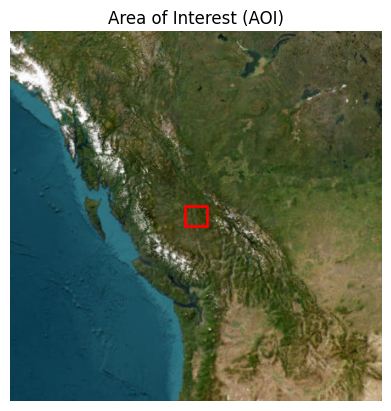

In [3]:
aoi_buf = aoi.copy()
aoi_buf.geometry = aoi_buf.geometry.buffer(1_000_000, cap_style='square')

fig, ax = plt.subplots()
aoi_buf.plot(ax=ax, facecolor='none', edgecolor='none')
aoi.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery,
                attribution="", crs=aoi.crs)

plt.title('Area of Interest (AOI)')

Lets take a look at the number of cutblocks in larger dataset extent. Given that we have a large number, it means we have a good dataset to do any analysis on. 

In [4]:
print(len(cutblocks))

33387


Let’s begin by summarizing how harvest activity has varied over time. By looking at the distribution of `harvest_year`, we can get a sense of which years had more or less harvesting. This kind of high-level overview helps us explore trends and might lead us to ask deeper, more focused questions about the data.

<Axes: xlabel='harvest_year', ylabel='Count'>

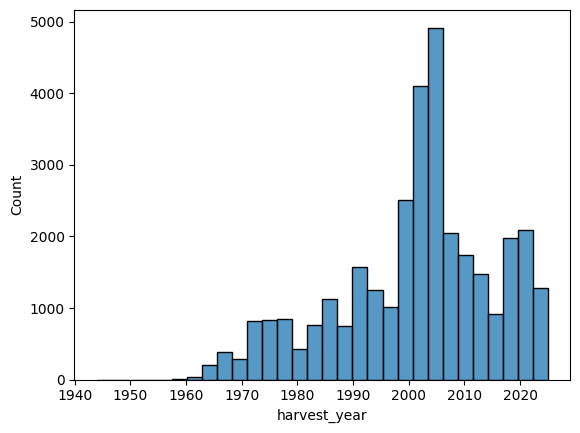

In [ ]:
sns.histplot(cutblocks['harvest_year'], bins=30)

After exploring the distribution of harvest years overall, we now map the cutblocks by their `harvest_year` to visualize where harvesting has occurred over time. This allows us to observe spatial patterns in harvesting activity. For example, whether newer cutblocks are expanding into new areas or whether certain regions were harvested earlier than others.

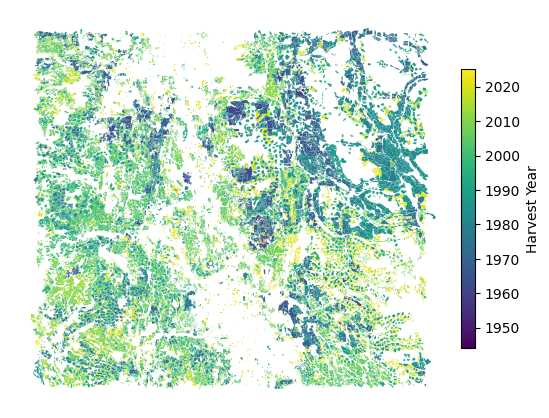

In [6]:
# Visualize cutblocks by year
fig, ax = plt.subplots(figsize=(6, 6))
cutblocks.plot(ax=ax, column='harvest_year')
ax.set_axis_off()
plt.colorbar(ax.collections[0], ax=ax, label='Harvest Year', fraction=0.03, pad=0.01)

This block of code loads a Digital Elevation Model (DEM) raster file, processes it for analysis/visualization, and ensures it’s aligned with your vector data (e.g., cutblocks)

In [7]:
# Load the DEM and visualize
with rasterio.open(dem_fpath) as dem_src:
    dem = dem_src.read(1)
    nodata_value = dem_src.nodata
    dem = dem.astype('float16')
    dem[dem == nodata_value] = np.nan
    dem_transform = dem_src.transform

    dem_crs = dem_src.crs
    assert dem_crs == cutblocks.crs, "CRS of DEM and cutblocks do not match!"



To better understand the terrain of our study area, we visualize the Digital Elevation Model (DEM) using a color-coded map. This plot displays elevation values using a natural “terrain” color gradient, making it easy to identify features like valleys, slopes, and highlands. The elevation data was preprocessed by converting NoData values to NaN and ensuring it aligned spatially with other layers like the cutblocks. This elevation map provides important geographic context and can help us explore how topography may influence harvesting patterns or accessibility.

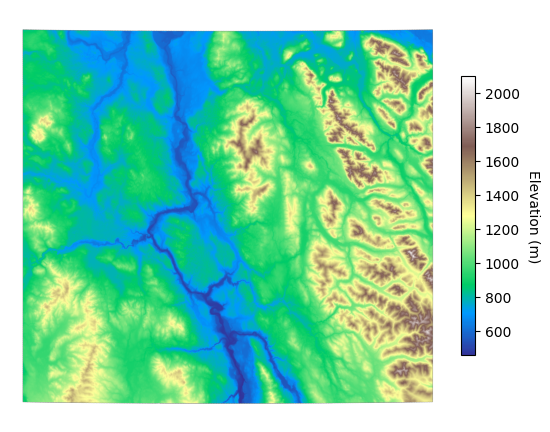

In [8]:
# Set colourmap
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(dem, cmap='terrain')
ax.set_axis_off()

cbar = plt.colorbar(ax.images[0], ax=ax, fraction=0.03, pad=0.01)
cbar.set_label('Elevation (m)', rotation=270, labelpad=15)

With a clear understanding of where and when harvesting has occurred, combined with topographic context from the elevation map, we now have a solid foundation for deeper exploration. This initial analysis raises important questions: Are certain elevations or slopes more frequently harvested? Have harvesting patterns shifted over time, and if so, why? Are there spatial clusters that suggest policy, economic, or environmental influences? These visual and statistical tools are just the beginning. Use them to guide your own questions, test hypotheses, and uncover the underlying dynamics shaping the landscape.